In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MLZILLA_CLEANED_DATASET.xlsx to MLZILLA_CLEANED_DATASET.xlsx


In [ ]:
# importing required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

In [ ]:
df = pd.read_excel("MLZILLA_CLEANED_DATASET.xlsx")
print(f"The Shape before processing : {df.shape}")

The Shape before processing : (6598, 28)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'CustomerLifetimeValue',
       'NetPromoterScore', 'AverageCallDuration', 'NumberOfComplaints',
       'PreferredContactMethod', 'LastInteractionDate', 'BillingCycle',
       'NumberOfDependents', 'Churn'],
      dtype='object')

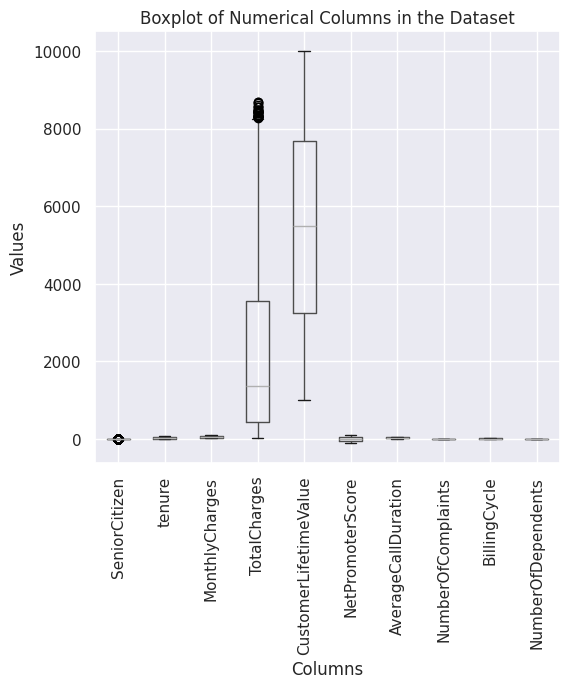

In [ ]:
#visualising outliners

num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(6, 6))

# Adjust figure size based on number of columns
if num_columns > 16:
    fig.set_size_inches(6, num_columns * 0.2)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Numerical Columns in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import pandas as pd

def remove_outliers(df, columns, replace_with_nan=False):
    """
    Removes or replaces outliers using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to check for outliers.
    replace_with_nan (bool): If True, replaces outliers with NaN instead of removing them.

    Returns:
    pd.DataFrame: Cleaned DataFrame with outliers removed or replaced.
    """
    df_cleaned = df.copy()

    for column in columns:
        if column not in df_cleaned.columns:
            print(f"⚠️ Warning: Column '{column}' not found in DataFrame. Skipping...")
            continue  # Skip missing columns

        if df_cleaned[column].isna().all():
            print(f"⚠️ Warning: Column '{column}' contains only NaN values. Skipping...")
            continue  # Skip empty columns

        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_outliers = outliers.sum()

        if num_outliers > 0:
            print(f"📌 Column '{column}': Removing {num_outliers} outliers")

            if replace_with_nan:
                df_cleaned.loc[outliers, column] = None  # Replace with NaN
            else:
                df_cleaned = df_cleaned[~outliers]  # Remove outliers

    return df_cleaned

In [ ]:
# Remove outliers (default behavior)
df= remove_outliers(df, ['TotalCharges', 'CustomerLifetimeValue'])

📌 Column 'TotalCharges': Removing 33 outliers


In [ ]:
# Remove outliers (default behavior)
df= remove_outliers(df, ['TotalCharges', 'CustomerLifetimeValue'])

📌 Column 'TotalCharges': Removing 10 outliers


In [ ]:
# Remove outliers (default behavior)
df= remove_outliers(df, ['TotalCharges'])

📌 Column 'TotalCharges': Removing 1 outliers


In [ ]:
# Remove outliers (default behavior)
df= remove_outliers(df, ['TotalCharges'])

📌 Column 'TotalCharges': Removing 2 outliers


In [ ]:
print(f"The shape of dataset : {df.shape}")

The shape of dataset : (6552, 28)


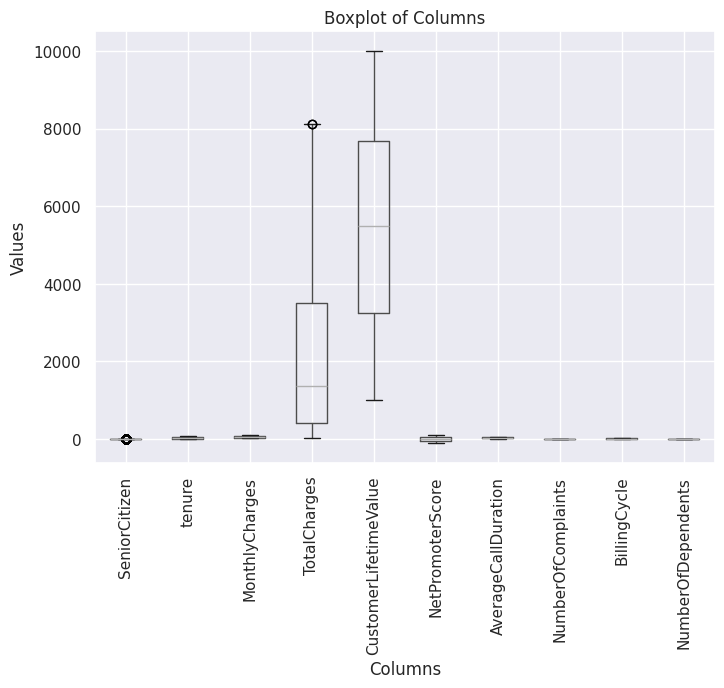

In [ ]:
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(6, 6))
if num_columns > 16:
    fig.set_size_inches(8, num_columns * 0.2)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.xticks(rotation=90)

plt.show()

Very less outliners now

In [ ]:
#Check the data which needs to be scaled

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize list for columns needing scaling
columns_needs_to_be_scaled = []

# Check for values outside the [0,1] range
for column in numeric_columns:
    if (df[column].max() > 1) or (df[column].min() < 0):  # Check max and min values
        columns_needs_to_be_scaled.append(column)

# Display results
print()
print(f"Columns with needs to be scaled: {columns_needs_to_be_scaled}")


Columns with needs to be scaled: ['tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerLifetimeValue', 'NetPromoterScore', 'AverageCallDuration', 'NumberOfComplaints', 'BillingCycle', 'NumberOfDependents']


In [ ]:
#performing min max scaling

from sklearn.preprocessing import StandardScaler

# Columns to scale
#columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AverageCallDuration', 'NumberOfComplaints']

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform on training data
df[columns_needs_to_be_scaled] = scaler.fit_transform(df[columns_needs_to_be_scaled])

In [ ]:
#Binary Distributing the target '''churn'''
df['Churn'] = df['Churn'].map(dict(Yes=1, No=0))
df['Churn'].head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns, len(categorical_columns))

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'PreferredContactMethod',
       'LastInteractionDate'],
      dtype='object') 17


In [ ]:
#performing one hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(f"The shape of dataset after one hot encoding : {df.shape}")
print()
print(f"The dataset after one hot encoding")
print(f"{df.info()}")

The shape of dataset after one hot encoding : (6552, 40)

The dataset after one hot encoding
<class 'pandas.core.frame.DataFrame'>
Index: 6552 entries, 0 to 6597
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          6552 non-null   int64  
 1   tenure                                 6552 non-null   float64
 2   MonthlyCharges                         6552 non-null   float64
 3   TotalCharges                           6552 non-null   float64
 4   CustomerLifetimeValue                  6552 non-null   float64
 5   NetPromoterScore                       6552 non-null   float64
 6   AverageCallDuration                    6552 non-null   float64
 7   NumberOfComplaints                     6552 non-null   float64
 8   BillingCycle                           6552 non-null   float64
 9   NumberOfDependents                     6552 non-null

In [ ]:
#relocating churn to last
df_1 = pd.DataFrame(df['Churn'],columns = ['Churn'])
df = df.drop('Churn', axis=1)
df['Churn'] = df_1['Churn']
df.shape

(6552, 40)

In [ ]:
#Balancing Churn CLass

In [ ]:
class_counts = df['Churn'].value_counts()
class_counts

,count
Churn,
0,4822
1,1730


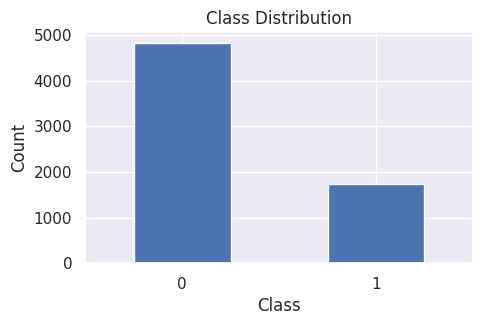

In [ ]:
plt.figure(figsize=(5,3))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

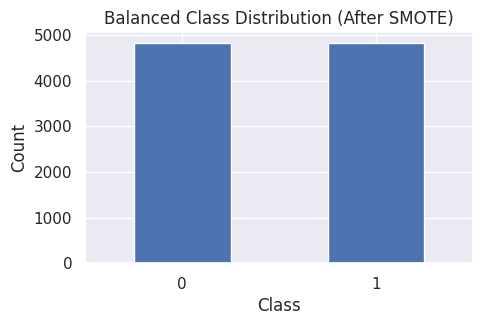

In [ ]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.iloc[:,:-1]
y = df.loc[:,'Churn']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify new class distribution
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5,3))
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Balanced Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.to_excel('MLZILLA Processed Dataset.xlsx', index=False)
files.download('MLZILLA Processed Dataset.xlsx')
print('File Saved Succesfully')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File Saved Succesfully


[DATA CLEANING](https://colab.research.google.com/drive/11b-0GUu3f-7YyzjnXqU3FUBvKD1ytw2R?usp=sharing)

[ DATA ANALYIS AND MODEL TRAINING](https://colab.research.google.com/drive/1Gib6slRLlh5o7UwDxsrIZYglcYQlHYQM?usp=sharing)